In [1]:
#importing libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [2]:
df_listings = pd.read_csv('C:/Users/kimhy/Documents/listings.csv')
df_venues = pd.read_csv('C:/Users/kimhy/Documents/venues.csv.gz', compression='gzip')

In [15]:
pd.DataFrame(df_listings['metropolitan'].value_counts())

,metropolitan
LA,31211
austin,9662
new_orleans,5307
nashville,3277
asheville,864


In [16]:
pd.DataFrame(df_venues['city'].value_counts())

,city
los angeles,66492
new orleans,18880
austin,18708
nashville,10491
asheville,6436


### Thus, we will be focusing on Los Angeles, New Orleans, Austin and Nashville who have relatively large amount of data to analyze 

#### Now for plotting

C:\Users\kimhy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


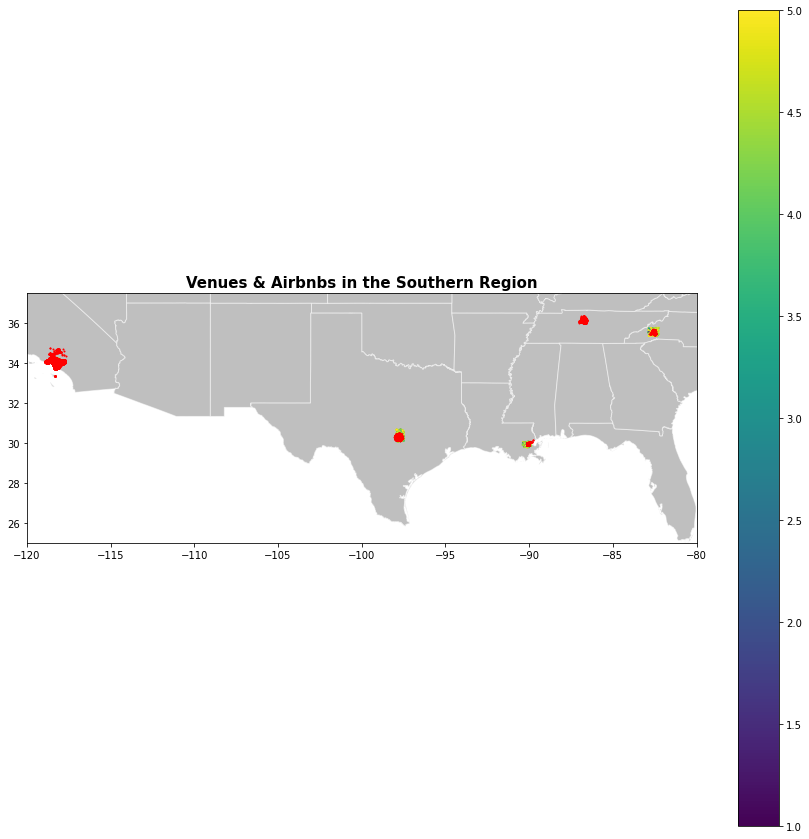

In [14]:
# import street map
street_map = gpd.read_file(r'C:\Users\kimhy\Documents\cb_2018_us_state_500k.shp')
# designate coordinate system
crs = {'init':'epsg:4326'}
# zip x and y coordinates into single feature
geometry_venues = [Point(xy) for xy in zip(df_venues['longitude'], df_venues['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df_venues, crs = crs, geometry = geometry_venues)

geometry_listings = [Point(xy) for xy in zip(df_listings['longitude'], df_listings['latitude'])]
listing_geo_df = gpd.GeoDataFrame(df_listings, crs=crs, geometry = geometry_listings)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add mapfile to axes
street_map.plot(ax=ax, alpha=0.5,color='grey',edgecolor='white')

#plotting the venues
geo_df.plot(column='rating',ax=ax,alpha=1, legend=True,markersize=1)
#plotting the listings of Airbnb 
listing_geo_df.plot( c = 'red', ax=ax, alpha=1, legend=True, markersize=1)

# add title to graph
plt.title('Venues & Airbnbs in the Southern Region', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display (LA)
plt.xlim(-120,-80)
plt.ylim( 25,37.5)

# show map
plt.show()